In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pytrends.request import TrendReq

columns = ['City', 'Big Data Job Offers', 'Data Science Job Offers', 'Machine Learning Job Offers']
europe_cities = {}
latam_cities = {}
usa_cities = {}

In [2]:
req1 = TrendReq()
req1.build_payload(kw_list=['big data', 'data science', 'machine learning'])

trends = req1.interest_by_region('CITY')
trendy = trends.drop(trends[(trends['big data'] == 0) & (trends['data science'] == 0) & (trends['machine learning'] == 0)].index)
trendy.sort_index()

big data  data science  machine learning
geoName                                                   
Bangkok                 56            18                26
Barcelona               65            12                23
Bengaluru               45            20                35
Berlin                  47            17                36
Chennai                 56            17                27
Chicago                 35            32                33
Diadema                 74            10                16
Gurgaon                 46            20                34
Howrah                  55            18                27
Hyderabad               46            25                29
Istanbul                51            13                36
Jakarta                 64            14                22
Kuala Lumpur            61            19                20
London                  46            22                32
Los Angeles             37            26                37
Madrid                  76             8                16
Melbourne               44            27                29
Mexico City             65            15                20
Moscow                  49            16                35
Mumbai                  49            20                31
New Delhi               46            23                31
New York                39            28                33
Noida                   53            17                30
Paris                   65            11                24
Pimpri-Chinchwad        54            19                27
Pune                    46            18                36
Rome                    62            14                24
San Francisco           28            30                42
Santiago                61            14                25
Seoul                   47            10                43
Singapore               45            21                34
Sydney                  45            25                30
Toronto                 43            20                37
Warsaw                  56            17                27
Washington              42            33                25

In [3]:
trends.drop(trends[(trends['big data'] != 0) & (trends['data science'] != 0) & (trends['machine learning'] != 0)].index).sort_index()

big data  data science  machine learning
geoName                                                   
Ahmedabad                0             0                 0
Amsterdam                0             0                 0
Atlanta                  0             0                 0
Auckland                 0             0                 0
Austin                   0             0                 0
Belo Horizonte           0             0                 0
Bogotá                   0             0                 0
Boston                   0             0                 0
Brisbane                 0             0                 0
Brussels                 0             0                 0
Budapest                 0             0                 0
Buenos Aires             0             0                 0
Casablanca               0             0                 0
Charlotte                0             0                 0
Coimbatore               0             0                 0
Dallas                   0             0                 0
Dubai                    0             0                 0
Dublin                   0             0                 0
Frankfurt                0             0                 0
Hamburg                  0             0                 0
Helsinki                 0             0                 0
Ho Chi Minh City         0             0                 0
Houston                  0             0                 0
Karachi                  0             0                 0
Kiev                     0             0                 0
Kolkata                  0             0                 0
Lagos                    0             0                 0
Milan                    0             0                 0
Montreal                 0             0                 0
Munich                   0             0                 0
Ottawa                   0             0                 0
Philadelphia             0             0                 0
Rio de Janeiro           0             0                 0
Riyadh                   0             0                 0
San Diego                0             0                 0
San Jose                 0             0                 0
Sandton                  0             0                 0
Seattle                  0             0                 0
Stockholm                0             0                 0
São Paulo                0             0                 0
Tehran                   0             0                 0
Tel Aviv-Yafo            0             0                 0
Tunis                    0             0                 0
Utrecht                  0             0                 0
Vancouver                0             0                 0
Vienna                   0             0                 0
Zürich                   0             0                 0

In [4]:
def buildDic(dic, filename):
    f = open(filename, 'r')
    for line in f:
        data = line.strip().split(",")
        city = data[0]
        job_offer = data[1]
        total_count = int(data[2])
        if city not in dic:
            dic[city] = {}
        dic[city][job_offer] = total_count

In [5]:
buildDic(europe_cities,"europe.csv")
buildDic(latam_cities, "latinAmerica.csv")
buildDic(usa_cities,"usa.csv")

In [6]:
def addRows(df, dic):
    for k, v in dic.items():
        df2 = pd.DataFrame(data=[[k, v['Big Data'], v['Data Science'], v['Machine Learning']]], columns=columns)
        df = df.append(df2, ignore_index=True)
    df.index = [(i+1) for i in range(len(dic))]
    return df

In [7]:
def total(df):
    df['Total New Tech Job Offers'] = df.apply(lambda x: x[columns[1]] + x[columns[2]] + x[columns[3]], axis=1)

In [8]:
maindf = pd.DataFrame(columns=columns)

In [9]:
europedf = pd.DataFrame(columns=columns)
europedf = addRows(europedf, europe_cities)

In [10]:
usadf = pd.DataFrame(columns=columns)
usadf = addRows(usadf, usa_cities)

In [11]:
latamdf = pd.DataFrame(columns=columns)
latamdf = addRows(latamdf, latam_cities)

In [12]:
maindf = maindf.append([europedf, usadf, latamdf], ignore_index=True)
maindf = maindf.sort_values('City')
maindf = maindf.reset_index(drop=True)
total(maindf)

In [13]:
maindf

City Big Data Job Offers Data Science Job Offers  \
0        Amsterdam                1291                    1211   
1          Atlanta                1599                     265   
2           Austin                 938                     349   
3        Barcelona                 417                     334   
4   Belo Horizonte                  12                       8   
5           Berlin                1022                     982   
6           Bogota                  41                      51   
7           Boston                2234                    6702   
8         Bruselas                 649                     860   
9         Budapest                 302                     372   
10    Buenos Aires                 172                     167   
11         Chicago                2045                     333   
12          Dallas                1596                     225   
13          Dublin                 617                    1184   
14        Estambul                  90                     152   
15       Estocolmo                 364                     394   
16       Frankfurt                 472                     355   
17        Hamburgo                 324                     280   
18         Houston                 674                      98   
19            Kiev                 273                     262   
20            Lima                  25                      19   
21          Lisboa                 252                     294   
22          London                4981                    5395   
23     Los Angeles                1592                     306   
24          Madrid                 528                     382   
25     Mexico City                 195                     226   
26          Milano                 284                     322   
27          Moscow                 171                     119   
28          Munich                 974                     853   
29        New York                5397                   10074   
30           Paris                3707                    1835   
31            Roma                 147                      88   
32   San Francisco                3867                    7657   
33        Santiago                 102                      61   
34       Sao Paulo                 274                     295   
35         Seattle                3593                     853   
36          Vienna                 162                     163   
37      Washington                4291                     861   
38          Zurich                 330                     551   

   Machine Learning Job Offers  Total New Tech Job Offers  
0                          494                       2996  
1                          371                       2235  
2                          517                       1804  
3                          158                        909  
4                           11                         31  
5                          688                       2692  
6                           11                        103  
7                         1271                      10207  
8                          196                       1705  
9                           81                        755  
10                         178                        517  
11                         640                       3018  
12                         454                       2275  
13                         259                       2060  
14                          39                        281  
15                         217                        975  
16                         170                        997  
17                         182                        786  
18                         269                       1041  
19                         110                        645  
20                          20                         64  
21                         132                       

In [14]:
total(europedf)
total(latamdf)
total(usadf)

In [15]:
europedf

City Big Data Job Offers Data Science Job Offers  \
1   Amsterdam                1291                    1211   
2   Barcelona                 417                     334   
3      Berlin                1022                     982   
4    Bruselas                 649                     860   
5    Budapest                 302                     372   
6      Dublin                 617                    1184   
7    Estambul                  90                     152   
8   Estocolmo                 364                     394   
9   Frankfurt                 472                     355   
10   Hamburgo                 324                     280   
11       Kiev                 273                     262   
12     Lisboa                 252                     294   
13     London                4981                    5395   
14     Madrid                 528                     382   
15     Milano                 284                     322   
16     Moscow                 171                     119   
17     Munich                 974                     853   
18      Paris                3707                    1835   
19       Roma                 147                      88   
20     Vienna                 162                     163   
21     Zurich                 330                     551   

   Machine Learning Job Offers  Total New Tech Job Offers  
1                          494                       2996  
2                          158                        909  
3                          688                       2692  
4                          196                       1705  
5                           81                        755  
6                          259                       2060  
7                           39                        281  
8                          217                        975  
9                          170                        997  
10                         182                        786  
11                         110                        645  
12                         132                        678  
13                        2689                      13065  
14                         165                       1075  
15                         138                        744  
16                          88                        378  
17                         578                       2405  
18                        1292                       6834  
19                          51                        286  
20                          64                        389  
21                         220                       1101

In [16]:
latamdf

City Big Data Job Offers Data Science Job Offers  \
1  Belo Horizonte                  12                       8   
2          Bogota                  41                      51   
3    Buenos Aires                 172                     167   
4            Lima                  25                      19   
5     Mexico City                 195                     226   
6        Santiago                 102                      61   
7       Sao Paulo                 274                     295   

  Machine Learning Job Offers  Total New Tech Job Offers  
1                          11                         31  
2                          11                        103  
3                         178                        517  
4                          20                         64  
5                          60                        481  
6                          49                        212  
7                         112                        681

In [17]:
usadf

City Big Data Job Offers Data Science Job Offers  \
1         Atlanta                1599                     265   
2          Austin                 938                     349   
3          Boston                2234                    6702   
4         Chicago                2045                     333   
5          Dallas                1596                     225   
6         Houston                 674                      98   
7     Los Angeles                1592                     306   
8        New York                5397                   10074   
9   San Francisco                3867                    7657   
10        Seattle                3593                     853   
11     Washington                4291                     861   

   Machine Learning Job Offers  Total New Tech Job Offers  
1                          371                       2235  
2                          517                       1804  
3                         1271                      10207  
4                          640                       3018  
5                          454                       2275  
6                          269                       1041  
7                          597                       2495  
8                         2196                      17667  
9                         2314                      13838  
10                        3153                       7599  
11                        1158                       6310

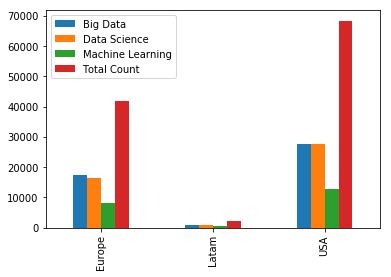

In [18]:
compdf = pd.DataFrame(index=['Europe','Latam','USA'], columns=['Big Data','Data Science','Machine Learning','Total Count'])
compdf.loc['Europe'] = [europedf[columns[1]].sum(),europedf[columns[2]].sum(),europedf[columns[3]].sum(),europedf.iloc[:,-1].sum()]
compdf.loc['Latam'] = [latamdf[columns[1]].sum(),latamdf[columns[2]].sum(),latamdf[columns[3]].sum(),latamdf.iloc[:,-1].sum()]
compdf.loc['USA'] = [usadf[columns[1]].sum(),usadf[columns[2]].sum(),usadf[columns[3]].sum(),usadf.iloc[:,-1].sum()]
compdf.plot.bar()